# Linear Regression


In [25]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## 3. Nonlinear

$$f(x) = \sin(3.2x) + 0.8x$$


### 3. 生成假資料

In [26]:
x = np.linspace(0, 5, 100)
y = np.sin(3.2*x) + 0.8*x + 0.3*np.random.randn(100)

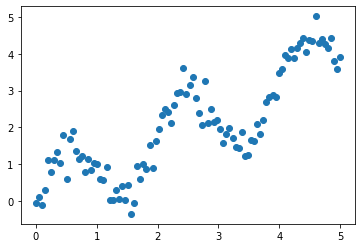

In [27]:
plt.scatter(x,y)

#### nonlinear

In [28]:
regr_lin = LinearRegression()

In [29]:
X = x.reshape(-1, 1)
print(X.shape)

(100, 1)


In [30]:
regr_lin.fit(X,y)

LinearRegression()

0.60785208644422


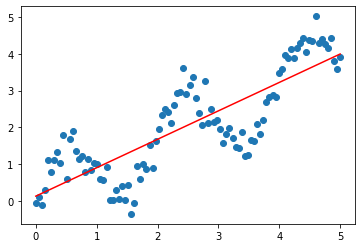

In [31]:
Y=regr_lin.predict(X)
plt.scatter(x,y)
plt.plot(x,Y , color='r')
mse = np.sum((Y-y)**2) / len(y)
print(mse)

果然超級不準, 該如何是好?

#### 多項式

多項式5次方

$$\widehat{y}=xw+b=w_{1}x_{1}+w_{2}x_{1}^{2}+w_{3}x_{1}^{3}+w_{4}x_{1}^{4}+w_{5}x_{1}^{5}+b$$

In [32]:
print(x.shape)

(100,)


In [33]:
X_poly = np.array([[k, k**2, k**3, k**4, k**5] for k in x])  # add k**6 to try it
print(X_poly.shape)

(100, 5)


In [34]:
regr_poly = LinearRegression()

In [35]:
regr_poly.fit(X_poly, y)

LinearRegression()

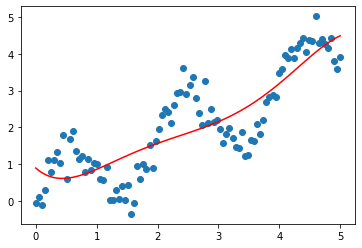

In [36]:
plt.scatter(x,y)
plt.plot(x, regr_poly.predict(X_poly), 'r')

In [37]:
print('Coefficients: ', regr_poly.coef_)
print('interception: ', regr_poly.intercept_)

Coefficients:  [-1.47419928  2.34567832 -1.12635978  0.23900699 -0.01800286]
interception:  0.8916119158740021


In [38]:
W=regr_poly.coef_
b=regr_poly.intercept_
np.dot(X_poly,W.T)+b

array([0.89161192, 0.82299711, 0.7654998 , 0.71830445, 0.68063142,
       0.65173628, 0.63090907, 0.6174736 , 0.61078675, 0.61023776,
       0.61524749, 0.62526774, 0.63978055, 0.65829745, 0.68035879,
       0.70553301, 0.73341592, 0.76363001, 0.79582374, 0.82967082,
       0.8648695 , 0.90114187, 0.93823313, 0.97591092, 1.01396455,
       1.05220435, 1.09046092, 1.12858445, 1.16644397, 1.20392669,
       1.24093724, 1.27739701, 1.3132434 , 1.34842912, 1.3829215 ,
       1.41670174, 1.44976427, 1.48211594, 1.5137754 , 1.54477235,
       1.57514684, 1.60494854, 1.63423605, 1.6630762 , 1.69154331,
       1.71971851, 1.747689  , 1.77554737, 1.80339086, 1.83132069,
       1.8594413 , 1.8878597 , 1.91668469, 1.9460262 , 1.97599459,
       2.00669988, 2.03825111, 2.07075557, 2.10431813, 2.13904052,
       2.17502061, 2.21235172, 2.25112188, 2.29141316, 2.33330091,
       2.3768531 , 2.42212958, 2.46918138, 2.51805   , 2.5687667 ,
       2.62135177, 2.67581386, 2.73214925, 2.79034113, 2.85035

In [39]:
regr_poly.predict(X_poly)

array([0.89161192, 0.82299711, 0.7654998 , 0.71830445, 0.68063142,
       0.65173628, 0.63090907, 0.6174736 , 0.61078675, 0.61023776,
       0.61524749, 0.62526774, 0.63978055, 0.65829745, 0.68035879,
       0.70553301, 0.73341592, 0.76363001, 0.79582374, 0.82967082,
       0.8648695 , 0.90114187, 0.93823313, 0.97591092, 1.01396455,
       1.05220435, 1.09046092, 1.12858445, 1.16644397, 1.20392669,
       1.24093724, 1.27739701, 1.3132434 , 1.34842912, 1.3829215 ,
       1.41670174, 1.44976427, 1.48211594, 1.5137754 , 1.54477235,
       1.57514684, 1.60494854, 1.63423605, 1.6630762 , 1.69154331,
       1.71971851, 1.747689  , 1.77554737, 1.80339086, 1.83132069,
       1.8594413 , 1.8878597 , 1.91668469, 1.9460262 , 1.97599459,
       2.00669988, 2.03825111, 2.07075557, 2.10431813, 2.13904052,
       2.17502061, 2.21235172, 2.25112188, 2.29141316, 2.33330091,
       2.3768531 , 2.42212958, 2.46918138, 2.51805   , 2.5687667 ,
       2.62135177, 2.67581386, 2.73214925, 2.79034113, 2.85035

#### RBF

$$\phi_i = e^{-\| x - c_i \|^2/2\sigma^2}$$

In [40]:
# normal distrubution
def RBF(x, center, sigma):
    k = np.exp(-(x - center)**2/(2*sigma**2))
    return k

In [41]:
sigma = 0.3

In [42]:
X_rbf = np.array([[RBF(k, .5, sigma), 
                  RBF(k, 1.5, sigma),
                  RBF(k, 2.5, sigma),
                  RBF(k, 3.5, sigma),
                  RBF(k, 4.5, sigma)] for k in x])



In [43]:
regr_rbf = LinearRegression()

In [44]:
regr_rbf.fit(X_rbf, y)

LinearRegression()

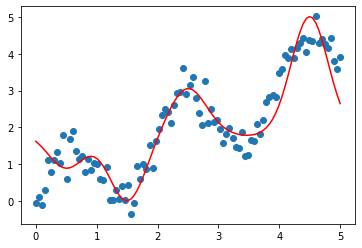

In [45]:
plt.scatter(x,y)
plt.plot(x, regr_rbf.predict(X_rbf), 'r')

In [52]:
print('Coefficients: ', regr_rbf.coef_)
print('interception: ', regr_rbf.intercept_)

Coefficients:  [-0.96520545 -1.85780281  1.20153124 -0.09093672  3.15254926]
interception:  1.8590631210448352


#### Comparison

In [53]:
Y_lin = regr_lin.predict(X)
Y_poly = regr_poly.predict(X_poly)
Y_rbf = regr_rbf.predict(X_rbf)

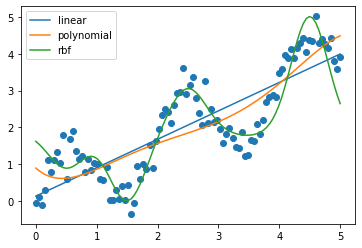

In [54]:
plt.scatter(x,y)

plt.plot(x, Y_lin, label='linear')
plt.plot(x, Y_poly, label='polynomial')
plt.plot(x, Y_rbf, label='rbf')
plt.legend()

## 請計算模型的MSE

In [55]:
print(np.sum((regr_lin.predict(X)-y)**2) / len(y))

0.60785208644422


In [56]:
print(np.sum((regr_poly.predict(X_poly)-y)**2) / len(y))

0.5446114441473939


In [57]:
print(np.sum((regr_rbf.predict(X_rbf)-y)**2) / len(y))

0.2763199434860412
